## Arguments

#### Logistic Growth
- prophet allows us to use logistic growth algorithm.  
- in order to use growth argument, you need to set `carrying capacity` and `floor`.  

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

# df['cap'] = 8.5
# df['floor'] = 1.5

#### Change Point Detection



In [2]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

model = Prophet(growth='linear')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

23:06:39 - cmdstanpy - INFO - Chain [1] start processing
23:06:39 - cmdstanpy - INFO - Chain [1] done processing


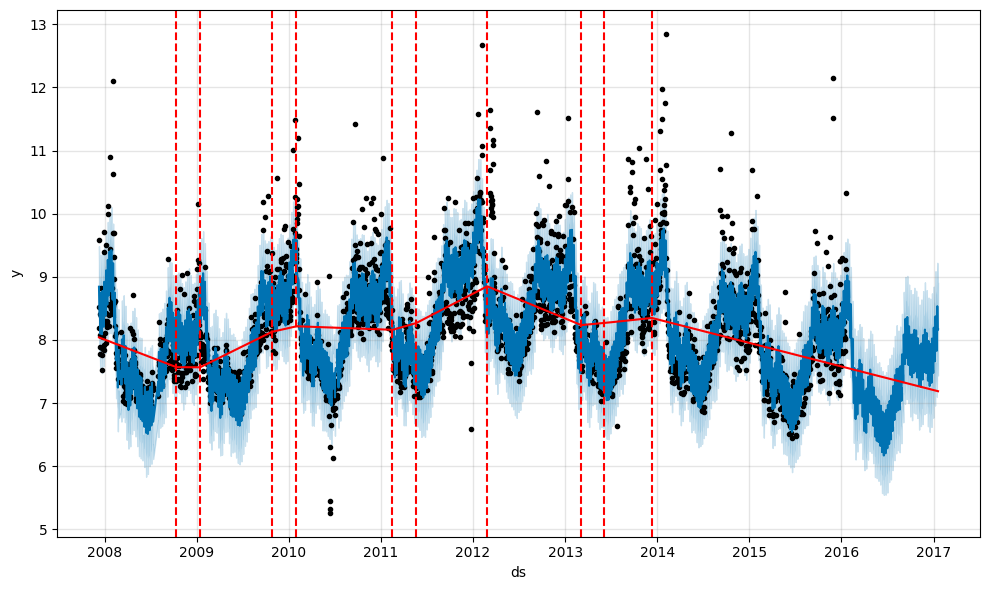

In [3]:
# detect change points automatically
fig = model.plot(forecast)
add = add_changepoints_to_plot(fig.gca(), model, forecast)

23:07:59 - cmdstanpy - INFO - Chain [1] start processing
23:07:59 - cmdstanpy - INFO - Chain [1] done processing


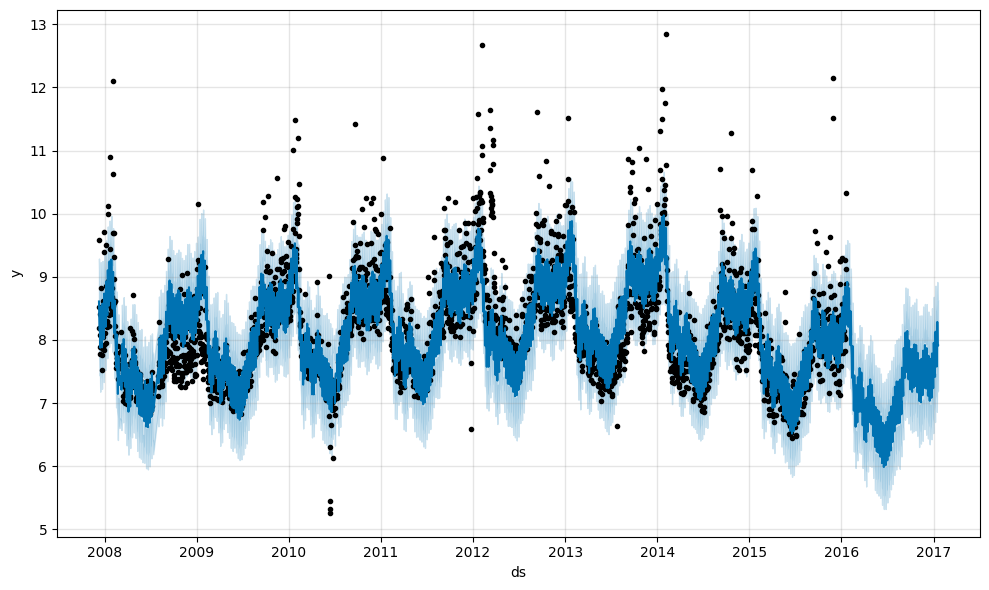

In [4]:
# or you can just specify change points manually
model = Prophet(changepoints=['2014-01-01'])
forecast = model.fit(df).predict(future)
fig = model.plot(forecast)